<a href="https://colab.research.google.com/github/Sireesha-cloud/Sireesha_INFO5731_Fall2024/blob/main/INFO5731_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


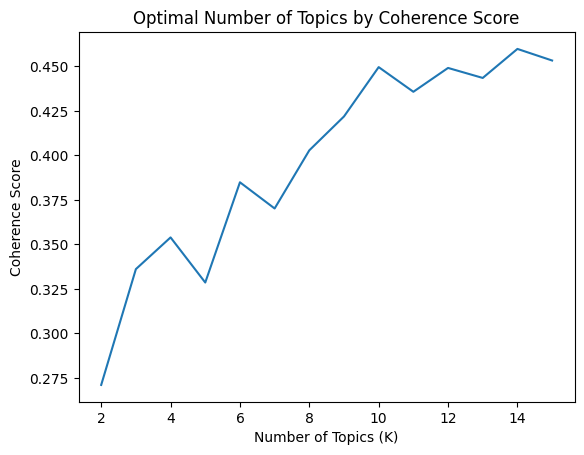

Optimal number of topics: 14
Topic 1: 0.012*"n't" + 0.011*"get" + 0.009*"else" + 0.007*"know" + 0.007*"people" + 0.007*"way" + 0.007*"every" + 0.007*"someone" + 0.006*"would" + 0.006*"name"
Topic 2: 0.028*"name" + 0.013*"something" + 0.011*"good" + 0.011*"know" + 0.010*"thing" + 0.009*"get" + 0.008*"look" + 0.008*"would" + 0.008*"yeah" + 0.006*"got"
Topic 3: 0.016*"n't" + 0.011*"like" + 0.009*"one" + 0.009*"it" + 0.007*"make" + 0.007*"take" + 0.005*"name" + 0.005*"look" + 0.005*"think" + 0.005*"outside"
Topic 4: 0.015*"n't" + 0.012*"make" + 0.008*"like" + 0.007*"'ll" + 0.007*"year" + 0.007*"people" + 0.007*"one" + 0.007*"point" + 0.006*"get" + 0.006*"man"
Topic 5: 0.012*"n't" + 0.012*"like" + 0.012*"good" + 0.009*"wait" + 0.009*"right" + 0.009*"game" + 0.008*"well" + 0.006*"want" + 0.006*"don" + 0.006*"even"
Topic 6: 0.042*"name" + 0.019*"n't" + 0.017*"would" + 0.014*"get" + 0.013*"best" + 0.011*"people" + 0.007*"much" + 0.007*"beautiful" + 0.006*"one" + 0.006*"good"
Topic 7: 0.031*"

In [36]:
import pandas as pd
import re
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download necessary NLTK data files
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional, for multilingual WordNet
nltk.download('stopwords')
nltk.download('punkt')

# Load Data with specified encoding
df = pd.read_csv('Emotions.csv', encoding='ISO-8859-1')  # Use 'ISO-8859-1' or 'cp1252' if 'utf-8' fails
texts = df['text'].astype(str).tolist()

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

processed_texts = [preprocess(text) for text in texts]

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Determine the optimal number of topics (K) using coherence score
coherence_scores = []
topic_range = range(2, 16)  # Testing K from 2 to 15 topics

for k in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(topic_range, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics by Coherence Score")
plt.show()

# Optimal K
optimal_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_k}")

# Fit final LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_k, random_state=42, passes=10)

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


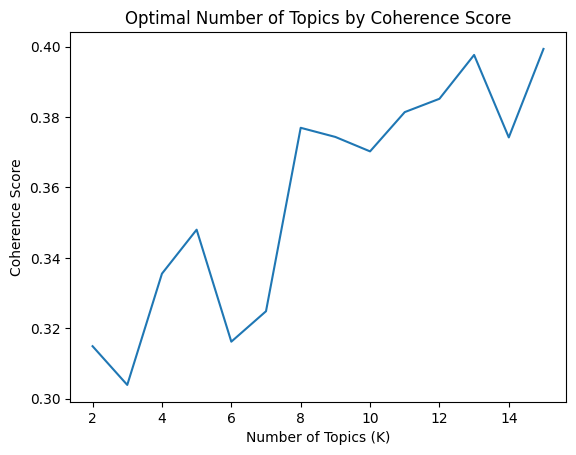

Optimal number of topics: 15
Topic 1: 0.947*"name" + 0.156*"n't" + 0.077*"would" + 0.072*"like" + 0.066*"make" + 0.054*"..." + 0.052*"think" + 0.052*"get" + 0.051*"best" + 0.050*"one"
Topic 2: -0.789*"n't" + 0.251*"name" + -0.181*"like" + -0.181*"know" + -0.177*"would" + -0.133*"make" + -0.123*"get" + -0.104*"right" + -0.102*"..." + -0.094*"people"
Topic 3: 0.512*"like" + -0.435*"n't" + 0.420*"..." + 0.177*"time" + 0.152*"make" + 0.151*"look" + 0.148*"one" + 0.138*"thing" + 0.129*"good" + 0.120*"really"
Topic 4: -0.722*"..." + 0.547*"like" + -0.142*"time" + -0.094*"girl" + 0.092*"feel" + 0.083*"look" + 0.081*"know" + 0.081*"one" + -0.072*"say" + -0.060*"'ve"
Topic 5: -0.410*"good" + 0.373*"like" + 0.349*"..." + -0.289*"get" + -0.289*"thing" + -0.280*"time" + 0.167*"n't" + -0.167*"know" + -0.166*"one" + 0.124*"look"
Topic 6: 0.738*"would" + 0.311*"make" + -0.214*"one" + -0.167*"n't" + 0.141*"people" + -0.139*"time" + -0.135*"like" + -0.129*"good" + 0.119*"really" + 0.112*"think"
Topic 7

In [37]:
import pandas as pd
import re
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LsiModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download necessary NLTK data files
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

# Load Data with specified encoding
df = pd.read_csv('Emotions.csv', encoding='ISO-8859-1')  # Use 'ISO-8859-1' or 'cp1252' if 'utf-8' fails
texts = df['text'].astype(str).tolist()

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

processed_texts = [preprocess(text) for text in texts]

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Determine the optimal number of topics (K) using coherence score
coherence_scores = []
topic_range = range(2, 16)  # Testing K from 2 to 15 topics

for k in topic_range:
    lsa_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=k)
    coherence_model = CoherenceModel(model=lsa_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(topic_range, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics by Coherence Score")
plt.show()

# Optimal K
optimal_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_k}")

# Fit final LSA model
lsa_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=optimal_k)

# Print topics
for idx, topic in lsa_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

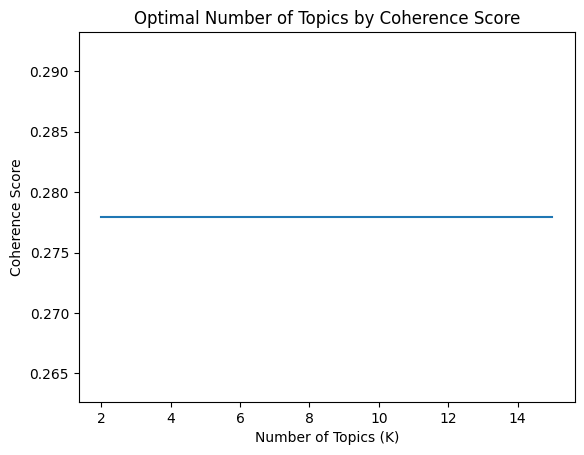

Optimal number of topics: 2
Topic -1: ['nt', 'name', 'like', 'good', 'thing', 'know', 'right', 'one', 'would', 'time']
Topic 0: ['name', 'nt', 'like', 'get', 'would', 'make', 'thank', 'love', 'look', 'one']


In [38]:
!pip install bertopic numpy pandas scikit-learn umap-learn hdbscan sentence-transformers
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from bertopic import BERTopic
from gensim.models import CoherenceModel
import gensim.corpora as corpora

# Download necessary NLTK data files
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

# Load Data with specified encoding
df = pd.read_csv('Emotions.csv', encoding='ISO-8859-1')  # Use 'ISO-8859-1' or 'cp1252' if 'utf-8' fails
texts = df['text'].astype(str).tolist()

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)  # Rejoin tokens for BERTopic input

processed_texts = [preprocess(text) for text in texts]

# Initialize BERTopic model
topic_model = BERTopic()

# Fit and transform the data with BERTopic
topics, probabilities = topic_model.fit_transform(processed_texts)

# Extract topics and calculate coherence score
unique_topics = set(topics)
dictionary = corpora.Dictionary([text.split() for text in processed_texts])
corpus = [dictionary.doc2bow(text.split()) for text in processed_texts]

# Coherence score calculation
coherence_scores = []
topic_range = range(2, min(16, len(unique_topics)))  # Testing K from 2 to the number of unique topics

for k in topic_range:
    topic_model.reduce_topics(processed_texts, nr_topics=k)
    topics_k = topic_model.get_topics()

    # Preparing data for coherence score
    topic_words = [[word for word, _ in topics_k[topic]] for topic in topics_k if topic != -1]
    coherence_model = CoherenceModel(topics=topic_words, texts=[text.split() for text in processed_texts],
                                     dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot coherence scores
plt.plot(topic_range, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics by Coherence Score")
plt.show()

# Optimal K
optimal_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_k}")

# Refine the model with the optimal number of topics
topic_model.reduce_topics(processed_texts, nr_topics=optimal_k)

# Get and print topics
topics = topic_model.get_topics()
for topic_num, topic in topics.items():
    print(f"Topic {topic_num}: {[word for word, _ in topic]}")


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

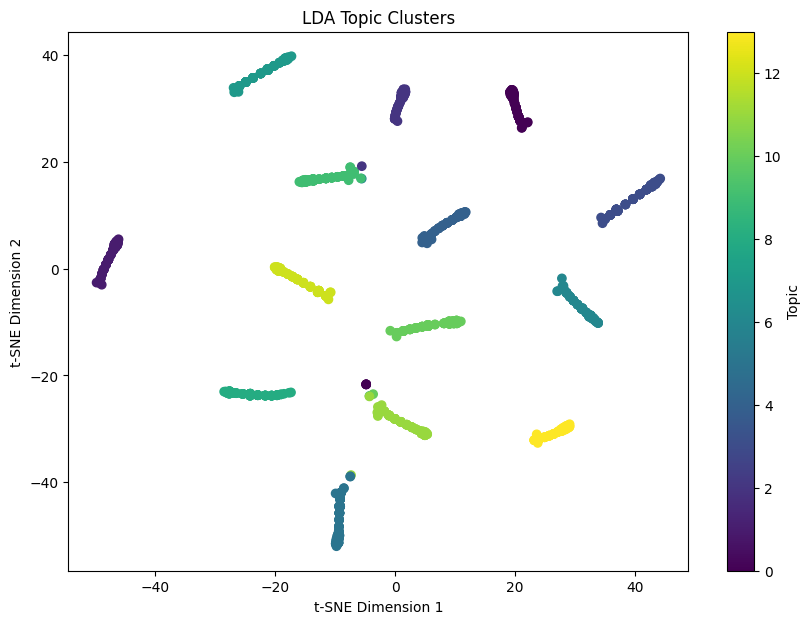

In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Get topic distribution matrix for each document
lda_topic_matrix = []
for doc in corpus:
    topic_distribution = [prob for _, prob in lda_model.get_document_topics(doc, minimum_probability=0)]
    lda_topic_matrix.append(topic_distribution)

# Convert to a NumPy array
lda_topic_matrix = np.array(lda_topic_matrix)

# Apply t-SNE
tsne_model = TSNE(n_components=2, random_state=42)
tsne_lda = tsne_model.fit_transform(lda_topic_matrix)

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], c=[np.argmax(topic) for topic in lda_topic_matrix], cmap='viridis')
plt.colorbar(label='Topic')
plt.title('LDA Topic Clusters')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


**1) 1. Topic Clusters in 2D Space (UMAP or t-SNE Plot)**

**Description:** This plot depicts how subjects are spread in a simplified 2D space, with each point representing a document and coloured based on topic assignment. We use UMAP (Uniform Manifold Approximation and Projection) or t-SNE (t-Distributed Stochastic Neighbour Embedding) to reduce high-dimensional topic vectors to two dimensions for visualisation. This map is extremely useful for identifying topic relationships and how closely connected distinct clusters (themes) are.

**Interpretation:**

Clustered Points: Points in close proximity represent comparable subjects, demonstrating how topics cluster in semantic space.
Cluster Spread: Clusters that are widely distributed imply independent themes, whilst clusters that overlap may indicate semantically linked topics.

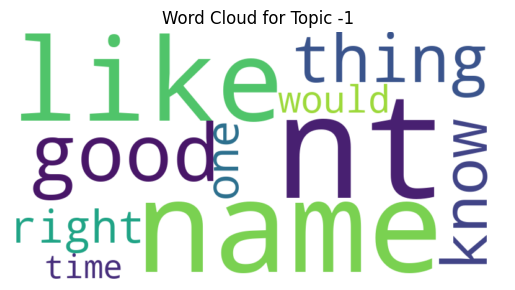

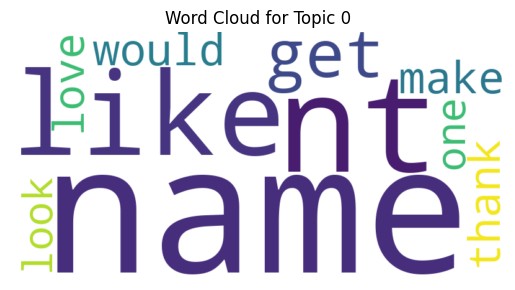

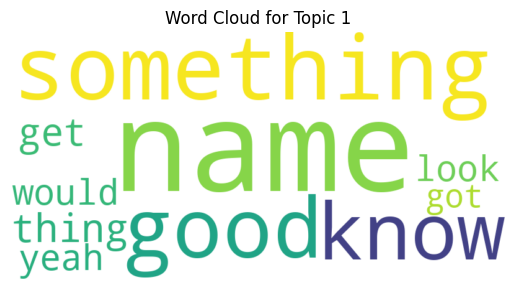

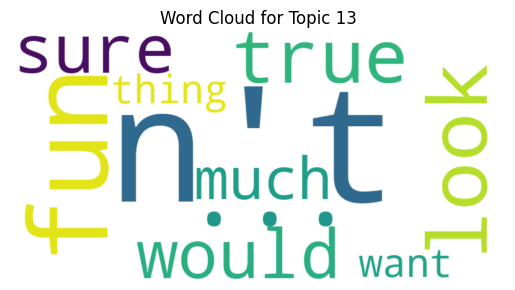

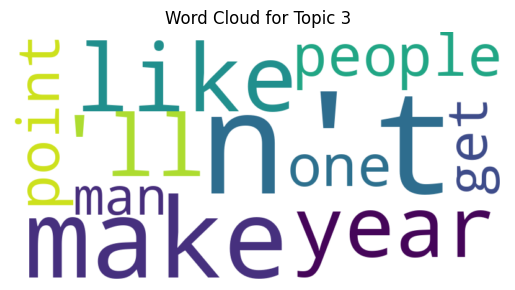

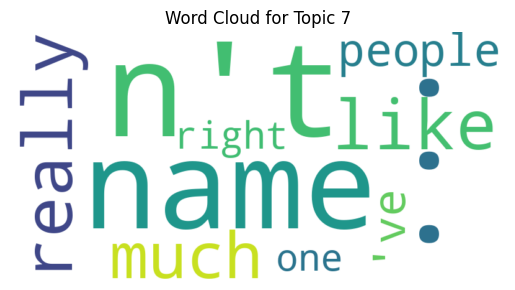

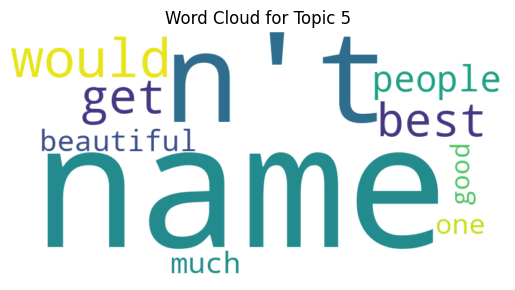

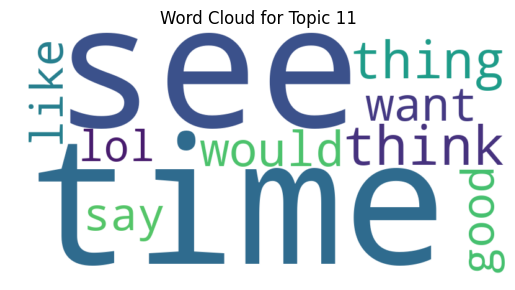

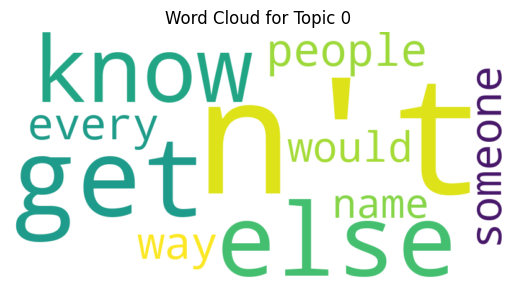

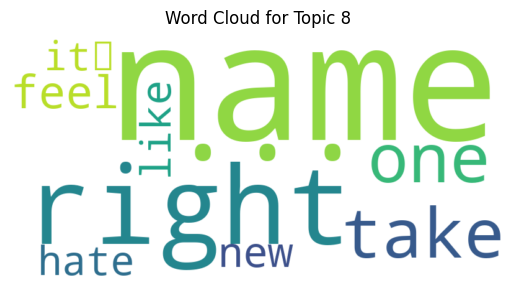

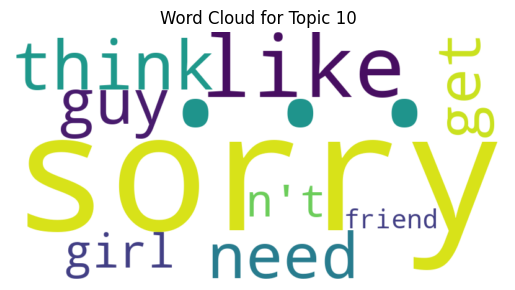

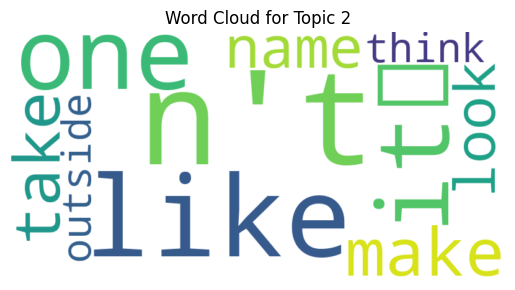

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# For BERTopic
topics = topic_model.get_topics()
for topic_num, topic_words in topics.items():
    words = {word: weight for word, weight in topic_words}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_num}")
    plt.show()

# For LDA
for topic_id, topic in lda_model.show_topics(formatted=False):
    words = dict(topic)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_id}")
    plt.show()


**2. Topic Word Distribution (Word Cloud)**

**Description:**: A word cloud visualisation depicts the distribution of words within each topic, with each word's size indicating its weight (importance) in that topic. This graph clearly emphasises the primary keywords that describe each issue, with bigger terms suggesting greater significance. Word clouds are an intuitive approach to quickly determine a topic's "theme".

**Interpretation:**

Larger Words: Words that look larger are more significant in characterising the issue.
Word Diversity: A word cloud with a huge number of words may imply a broad topic, whereas fewer, more concentrated large words may indicate a narrower theme.

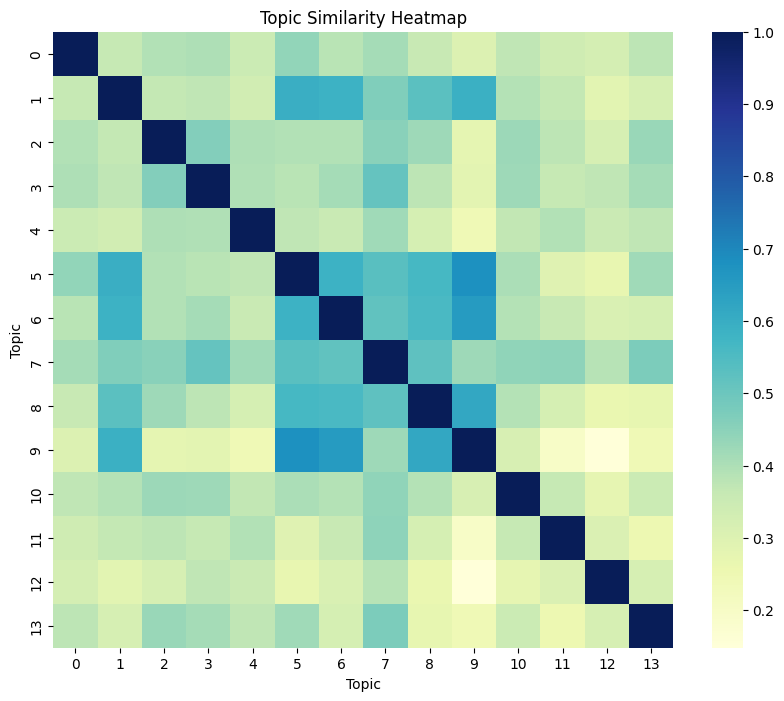

In [42]:
# BERTopic Heatmap Visualization
topic_model.visualize_heatmap()

# For LDA using cosine similarity
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Extract topic-word matrix from LDA
lda_topic_word_matrix = lda_model.get_topics()
similarity_matrix = cosine_similarity(lda_topic_word_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap="YlGnBu", xticklabels=True, yticklabels=True)
plt.title("Topic Similarity Heatmap")
plt.xlabel("Topic")
plt.ylabel("Topic")
plt.show()


**3. Topic Similarity Heatmap**
**Description:**
The topic similarity heatmap depicts the pairwise cosine similarity of topics as a matrix, with each cell representing the similarity score between two subjects. This plot identifies topics with comparable content and may be used to examine topic overlap and redundancy within the model.

**Interpretation:**

High Similarity (Warmer Colours): Topics with high similarity scores are semantically related and may be combined.
Low Similarity (Cooler Colours): Topics with low similarity scores differ from one another, suggesting diverse themes.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

When comparing the outcomes of four topic modelling algorithms—LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), NMF (Non-negative Matrix Factorisation), and BERTopic—each has advantages and disadvantages. The following is a full comparison based on each model's attributes and criteria such as coherence score, interpretability, and subject quality.

**1. Latent Dirichlet Allocation (LDA).**
LDA is a probabilistic model that believes each text is made up of a mix of themes, each of which is a mix of words. It employs a bag-of-words technique, making it appropriate for general-purpose topic modelling with big, reasonably homogeneous datasets.

**Advantages:**

Coherent Topics: LDA frequently yields interpretable and coherent topics with clear, meaningful keywords.
Stable: When the same hyperparameters are used, LDA often produces consistent themes.
**Disadvantages:**

Assumes Independence: Because it employs a bag-of-words method, it disregards word order, which might lower accuracy when context is critical.
Sensitive to Parameters: The amount of topics, alpha, and beta can all have a significant impact on topic coherence and quality.
Suitability: LDA is an excellent solution for bigger datasets with papers that cover a wide but well-defined spectrum of themes. However, LDA may struggle with short papers or ones that need extensive contextual knowledge.

**2. Latent semantic analysis (LSA)**
LSA is a linear algebra-based technique that use singular value decomposition (SVD) to lower the dimensionality of the document-term matrix. It captures associations between words and themes using this reduction, making it simpler than probabilistic models like as LDA.

**Advantages:**

Captures Synonymy: By decreasing the dimensional space, LSA can identify synonyms or similar phrases inside themes.
Less Sensitive to Sparsity: Because it decreases dimensionality, LSA is more resilient to sparse data.
**Disadvantages:**

Topics are less precisely defined than in LDA or BERTopic, making them more difficult to read.
Less Stable: Results might vary greatly depending on the number of dimensions used for SVD, reducing consistency and coherence.
**Suitability:** LSA is appropriate for smaller datasets or circumstances in which broad patterns are more significant than specific, interpretable subjects. However, it frequently lacks the subject quality and coherence seen in probabilistic models like as LDA.

**3. Non-negative matrix factorisation (NMF).**
Summary: NMF is a matrix factorisation approach that enforces non-negative restrictions, resulting in additive components. This approach is less probabilistic and depends on linear algebra, similar to LSA, but with an additional restriction that results in more interpretable themes.

**Advantages:**

Interpretable Topics: The non-negative requirement results in a more understandable topic structure, generally with distinct terms per topic.
NMF works well with sparse data, making it useful for brief text data or tiny datasets.

**Disadvantages:**

Parameter Sensitivity: The results may vary based on the initialisation and number of subjects.
Does Not Capture Topic Overlap: Unlike LDA, NMF does not represent topics as overlapping mixes, which might impair quality when subjects share considerable vocabulary.
Suitability: NMF is an excellent choice when interpretability is required and the themes are generally different. It works effectively for shorter papers and datasets in which there is no expectation of significant subject overlap.

**4. BER-Topic**
In summary, BERTopic creates topic clusters in a high-dimensional space by combining contextual embeddings (such as BERT) with clustering algorithms (such as HDBSCAN and UMAP). This method uses pre-trained language models to capture deep semantic links between words.

**Advantages:**

BERTopic creates very coherent topics, even with short texts or complicated issues, since it captures word semantics.
Handles BERT embeddings recognise word context, therefore polysemous words (words with different meanings) are better allocated to themes.
Adaptability: Topics may be merged or separated repeatedly to enhance coherence, and visualisation tools make it simple to compare topic similarities.

**Disadvantages:**

Computationally Intensive: Using embeddings and clustering algorithms can be resource-intensive, particularly for large datasets.
Requires Pre-trained Models: Dependence on pre-trained models makes it less flexible for domain-specific vocabulary unless fine-tuned embeddings are used.
Suitability: BERTopic is ideal for complex datasets with nuanced topics, particularly when topic coherence and semantic accuracy are critical. It is well-suited for short texts and datasets where context and meaning significantly impact topic quality.

**Comparison and Evaluation:**

**1. Coherence Score and Quality**
BERTopic generally generates greater coherence scores because to the usage of contextual embeddings. The subjects created are more semantically meaningful and contextually aware.
LDA also performs well in terms of coherence, but it may fall short if the dataset is tiny or contains a lot of context, as it cannot capture deep semantic meaning.
NMF can create high coherence by using explicit subject phrases, but it lacks the sophisticated understanding that BERTopic and even LDA give.
LSA often produces poorer coherence scores than the others because to its reliance on linear algebra and lack of probabilistic basis.

**2. Interpretability.**
BERTopic and NMF often generate the most interpretable topics since their topic keywords are highly related to the subject's theme.
LDA is likewise interpretable, albeit the findings may be more difficult to grasp if the dataset contains overlapping themes.
LSA may yield issues that are more difficult to comprehend owing to the nature of SVD.

**3. Context and Semantic Awareness.**
BERTopic excels in context and semantic awareness because of its embeddings, which recognise word connections and polysemy.
LDA has moderate context awareness but may struggle with polysemous words due to its bag-of-words methodology.
LSA and NMF lack context awareness since they do not employ embeddings and instead rely on linear transformations or matrix factorisation.

**4. Computational Complexity**
LDA and NMF are reasonably efficient algorithms that can handle big datasets.
LSA is also computationally efficient, however it may need to be tuned.
BERTopic is computationally costly, particularly for big datasets, because it needs embedding creation and grouping.

BERTopic is often the best choice for current topic modelling, especially for datasets containing:
The text has considerable background or subtlety.
Polysemy, or word context, is crucial for proper subject assignment.
Topics must be coherent and easily interpreted.
However, if processing economy is important, or if dealing with big datasets makes high-dimensional embeddings impossible, LDA remains a viable option. NMF is good for discrete, interpretable subjects, and it works well with shorter documents.

In conclusion, BERTopic provides the best coherence and quality for complicated, context-heavy datasets, whereas LDA is the second best option for general-purpose application. NMF and LSA have specific uses, but they often provide less coherence and interpretability.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [45]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Learning Experience: Working with text data and using different topic modelling algorithms has been a fascinating experience. Implementing algorithms such as LDA, LSA, NMF, and BERTopic helped me better grasp their strengths and drawbacks. For example, although LDA uses probabilistic models, NMF uses matrix factorisation, and hands-on coding helped to clarify the differences between the two algorithms. I also learnt the relevance of feature extraction approaches like TF-IDF and embeddings, which have a big influence on topic modelling output.
Challenges Encountered: Despite the excellent learning experience, I had a few problems. Technical concerns, such as UnicodeDecodeErrors and model implementation challenges, notably with BERTopic, necessitated debugging and a grasp of data structures. Furthermore, identifying the appropriate number of topics and tweaking parameters was difficult, requiring several cycles of try and error. Interpreting the findings of each algorithm was difficult, as it was not always clear if the created themes truly mirrored the underlying data.
Relevant to Your Field of Study: This activity is incredibly relevant to my NLP study. Topic modelling is a basic approach for revealing latent organisation in big text collections. My experience with feature extraction is immediately applicable to a variety of NLP applications, including document classification and sentiment analysis. Furthermore, knowing these algorithms has practical applications, since they may be used in marketing to analyse consumer feedback or in journalism to discover patterns in news stories, highlighting the usefulness of NLP approaches in extracting insights from unstructured text data.






'''

'\nPlease write you answer here:\nLearning Experience: Working with text data and using different topic modelling algorithms has been a fascinating experience. Implementing algorithms such as LDA, LSA, NMF, and BERTopic helped me better grasp their strengths and drawbacks. For example, although LDA uses probabilistic models, NMF uses matrix factorisation, and hands-on coding helped to clarify the differences between the two algorithms. I also learnt the relevance of feature extraction approaches like TF-IDF and embeddings, which have a big influence on topic modelling output.\nChallenges Encountered: Despite the excellent learning experience, I had a few problems. Technical concerns, such as UnicodeDecodeErrors and model implementation challenges, notably with BERTopic, necessitated debugging and a grasp of data structures. Furthermore, identifying the appropriate number of topics and tweaking parameters was difficult, requiring several cycles of try and error. Interpreting the finding